In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GlobalLandTemperaturesByCity.csv.zip to GlobalLandTemperaturesByCity.csv.zip


In [ ]:
import zipfile
import os

# Path to zip file
zip_path = "/content/GlobalLandTemperaturesByCity.csv.zip"

# Extract it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("climate_data")

# Check extracted files
os.listdir("climate_data")

['GlobalLandTemperaturesByCity.csv']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")


In [ ]:
df = pd.read_csv("/content/climate_data/GlobalLandTemperaturesByCity.csv")
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("/content/climate_data/GlobalLandTemperaturesByCity.csv")

# Convert date column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# Drop missing values for core analysis
df_clean = df[['dt', 'AverageTemperature', 'City', 'Country']].dropna()

# Extract year from date
df_clean['Year'] = df_clean['dt'].dt.year


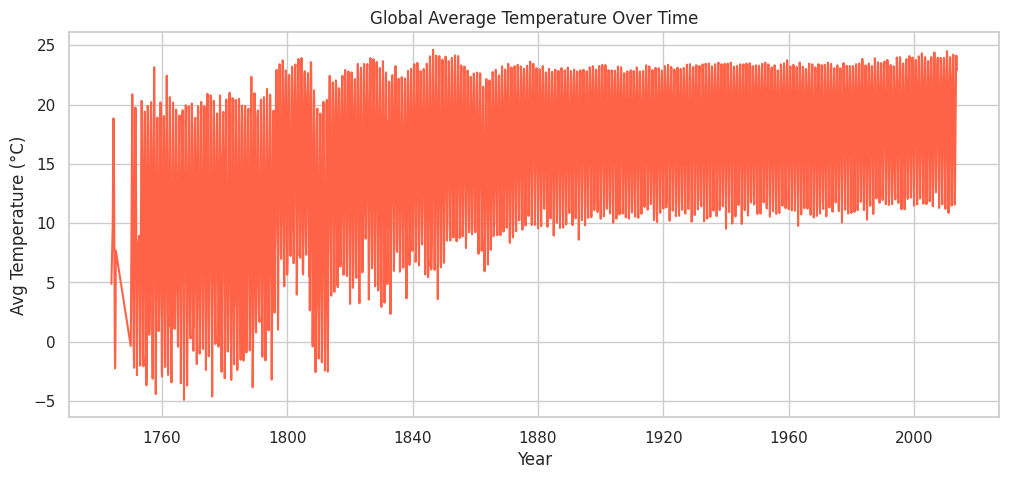

In [22]:
global_temp = df_clean.groupby('dt')['AverageTemperature'].mean().reset_index()

plt.figure(figsize=(12,5))
plt.plot(global_temp['dt'], global_temp['AverageTemperature'], color='tomato')
plt.title("Global Average Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.grid(True)
plt.show()


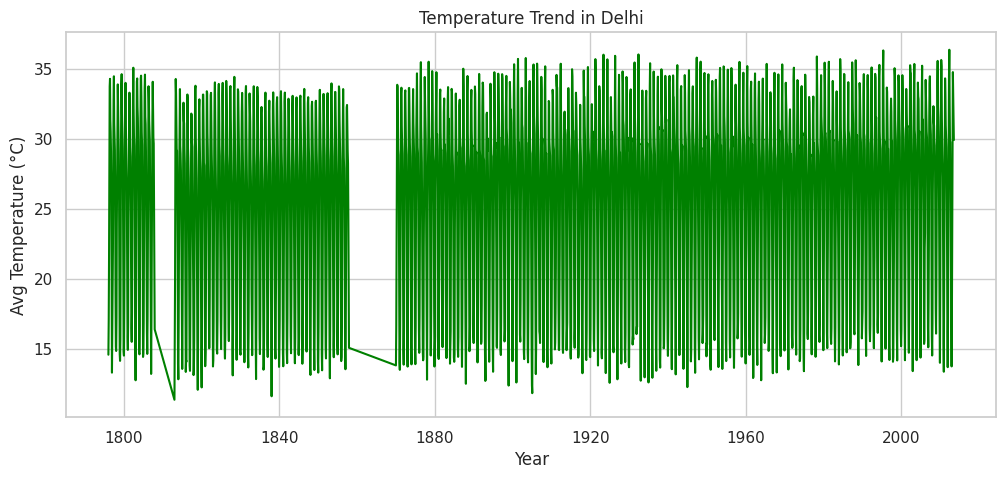

In [23]:
city = 'Delhi'
city_df = df_clean[df_clean['City'] == city]

plt.figure(figsize=(12,5))
plt.plot(city_df['dt'], city_df['AverageTemperature'], color='green')
plt.title(f"Temperature Trend in {city}")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.grid(True)
plt.show()


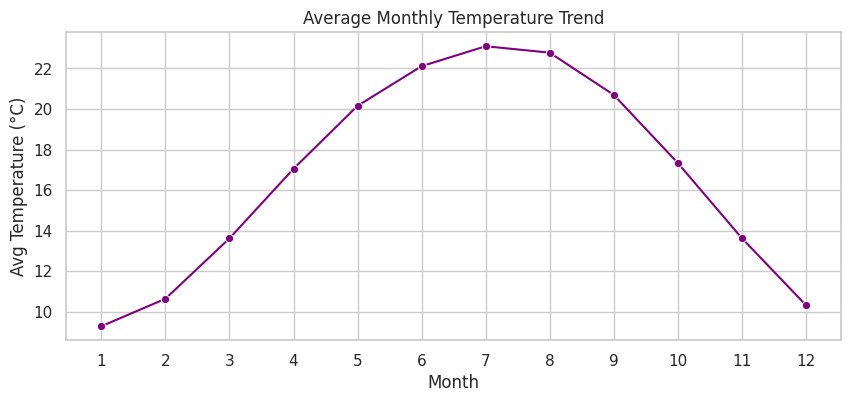

In [24]:
df_clean['Month'] = df_clean['dt'].dt.month

monthly_temp = df_clean.groupby('Month')['AverageTemperature'].mean()

plt.figure(figsize=(10,4))
sns.lineplot(x=monthly_temp.index, y=monthly_temp.values, marker="o", color="purple")
plt.title("Average Monthly Temperature Trend")
plt.xlabel("Month")
plt.ylabel("Avg Temperature (°C)")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


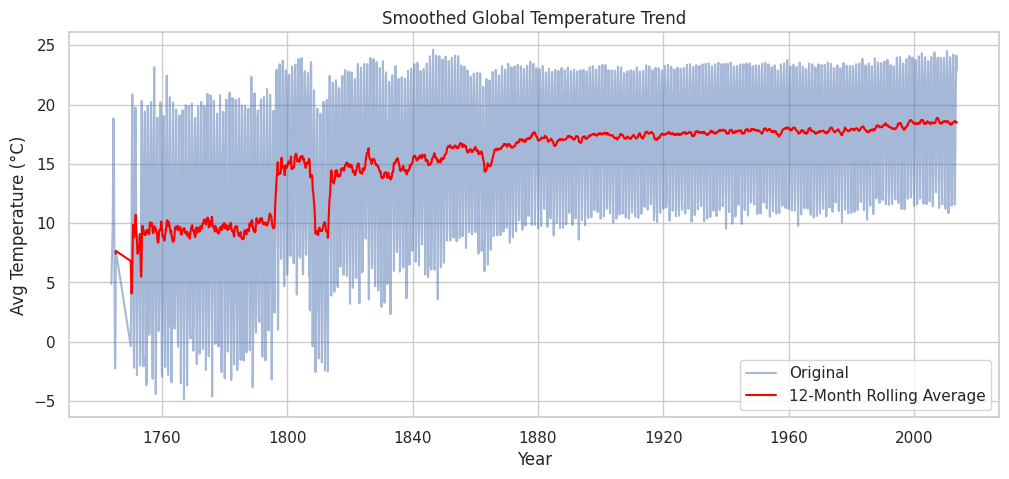

In [25]:
df_rolling = global_temp.copy()
df_rolling['RollingAvg'] = df_rolling['AverageTemperature'].rolling(window=12).mean()

plt.figure(figsize=(12,5))
plt.plot(df_rolling['dt'], df_rolling['AverageTemperature'], alpha=0.5, label="Original")
plt.plot(df_rolling['dt'], df_rolling['RollingAvg'], color='red', label="12-Month Rolling Average")
plt.title("Smoothed Global Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


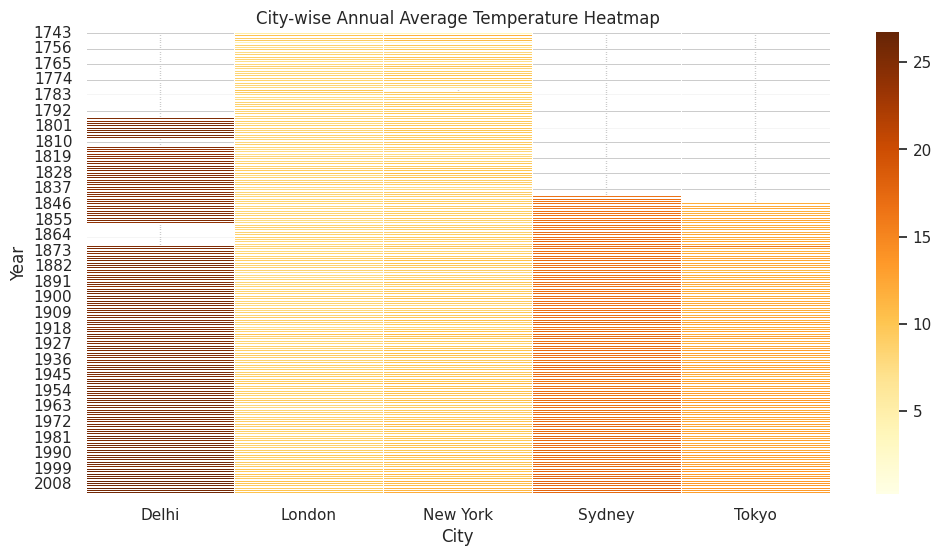

In [26]:
sample_cities = df_clean[df_clean['City'].isin(['Delhi', 'London', 'New York', 'Sydney', 'Tokyo'])]

pivot_df = sample_cities.pivot_table(index=sample_cities['dt'].dt.year,
                                      columns='City',
                                      values='AverageTemperature')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_df, cmap='YlOrBr', linewidths=0.5)
plt.title("City-wise Annual Average Temperature Heatmap")
plt.xlabel("City")
plt.ylabel("Year")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


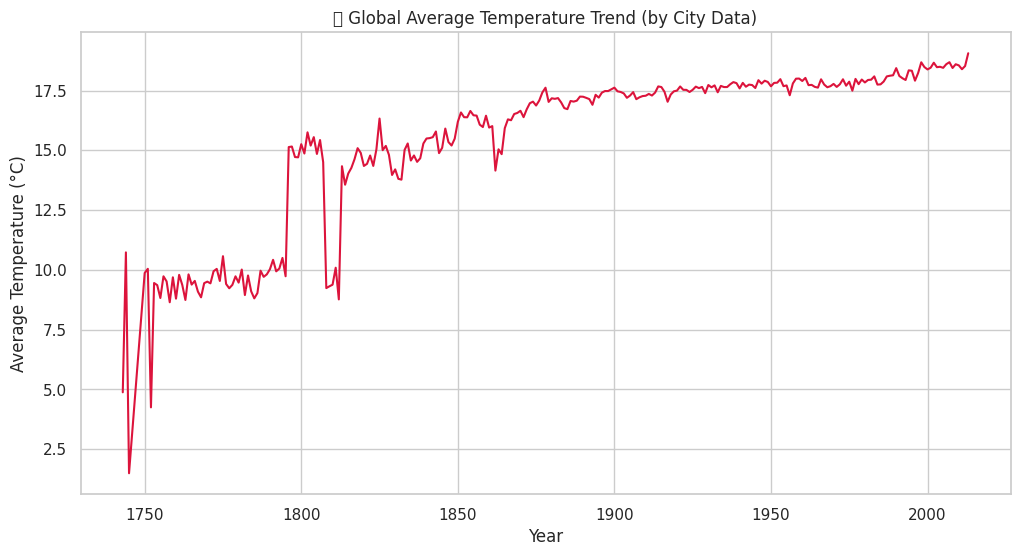

In [ ]:
global_avg_temp = df_clean.groupby('Year')['AverageTemperature'].mean()

plt.figure(figsize=(12,6))
global_avg_temp.plot(color='crimson')
plt.title("🌍 Global Average Temperature Trend (by City Data)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


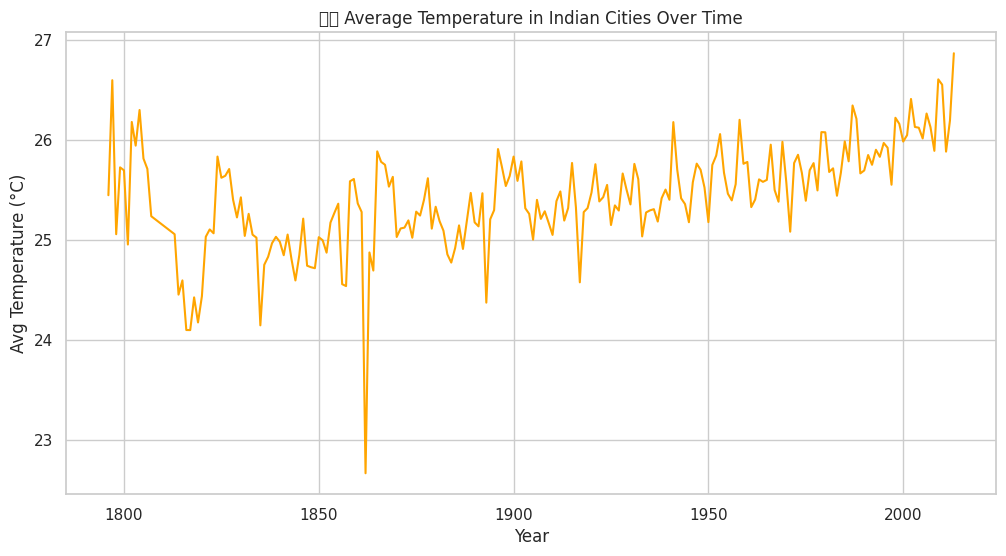

In [ ]:
india_temp = df_clean[df_clean['Country'] == 'India']
india_yearly = india_temp.groupby('Year')['AverageTemperature'].mean()

plt.figure(figsize=(12,6))
india_yearly.plot(color='orange')
plt.title("🇮🇳 Average Temperature in Indian Cities Over Time")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


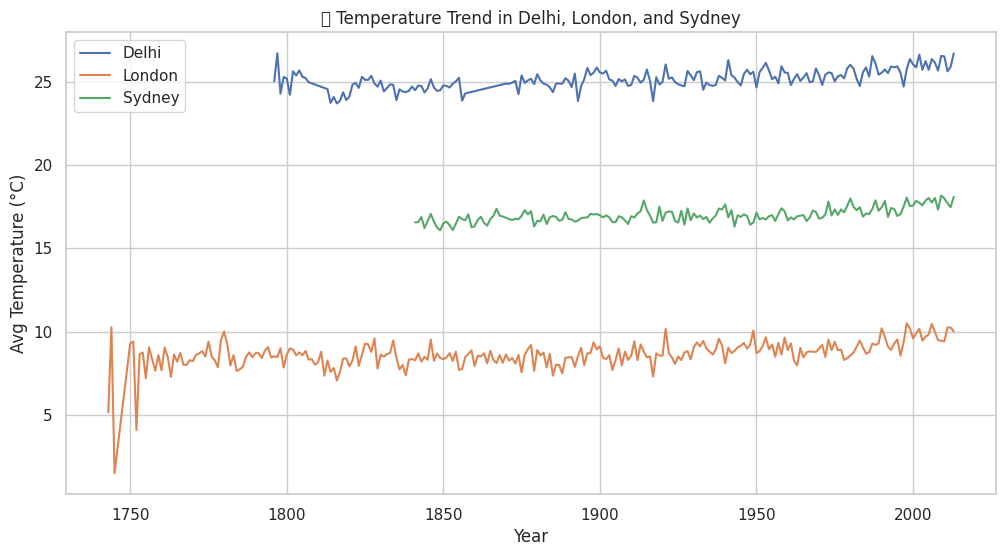

In [ ]:
cities = ['Delhi', 'London', 'Sydney']

plt.figure(figsize=(12,6))
for city in cities:
    city_data = df_clean[df_clean['City'] == city]
    city_yearly = city_data.groupby('Year')['AverageTemperature'].mean()
    plt.plot(city_yearly.index, city_yearly.values, label=city)

plt.title("🏙️ Temperature Trend in Delhi, London, and Sydney")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-18-2070631772.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='Reds_r')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


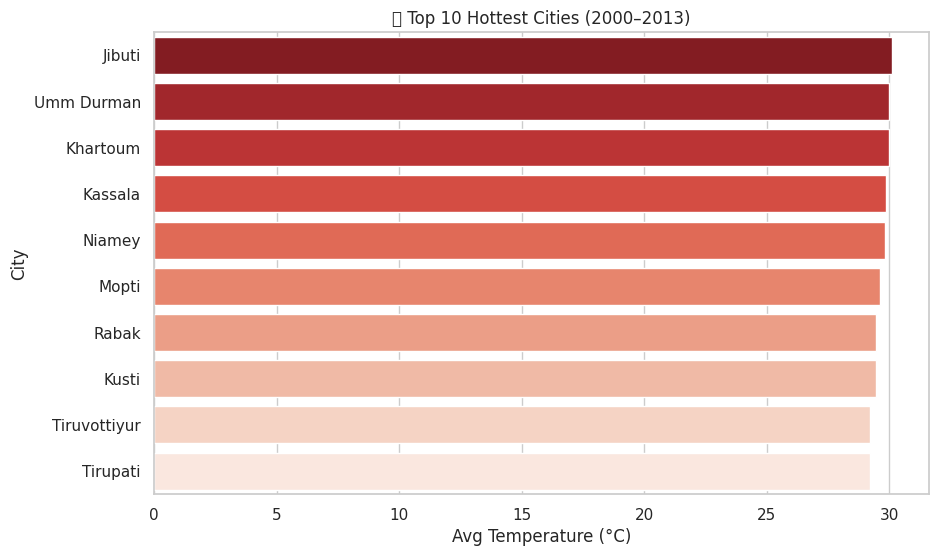

In [ ]:
recent = df_clean[df_clean['Year'] >= 2000]
top_cities = recent.groupby('City')['AverageTemperature'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Reds_r')
plt.title("🔥 Top 10 Hottest Cities (2000–2013)")
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("City")
plt.show()


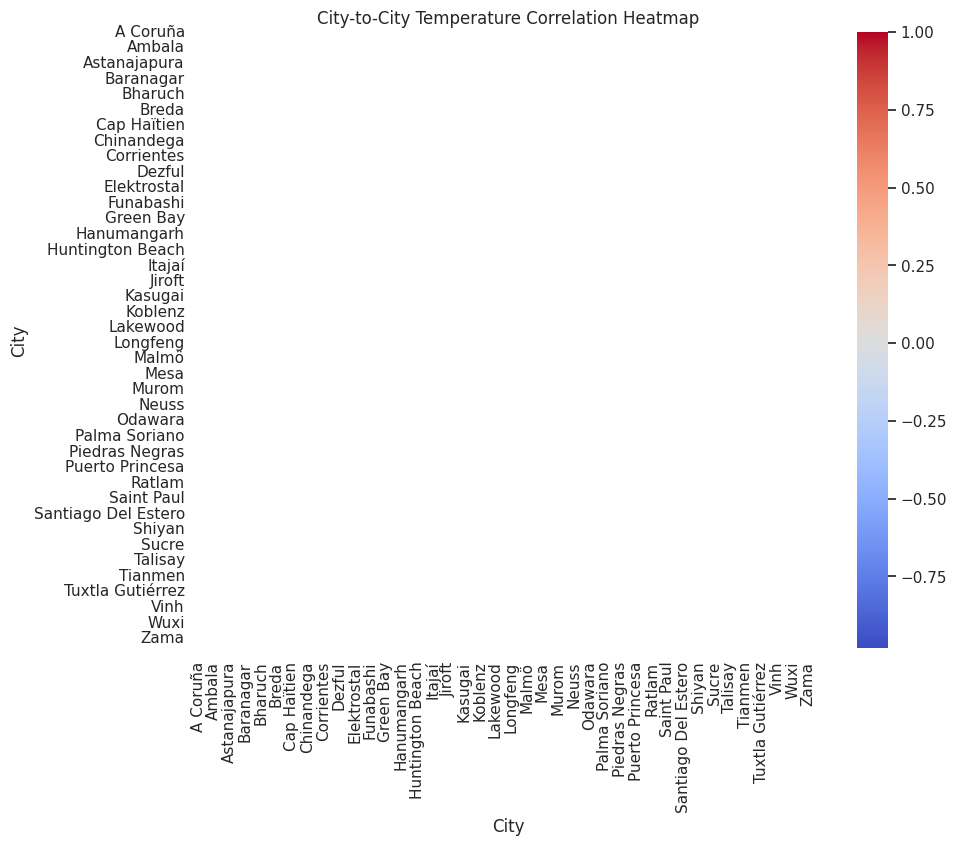

In [ ]:
# Optional: Check correlation of temperatures among cities
pivot_temp = df_clean[df_clean['Year'] >= 2000].pivot_table(index='dt', columns='City', values='AverageTemperature')
corr_matrix = pivot_temp.corr().fillna(0)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("City-to-City Temperature Correlation Heatmap")
plt.show()


/tmp/ipython-input-20-1331981951.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg.values, y=city_avg.index, palette='rocket')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


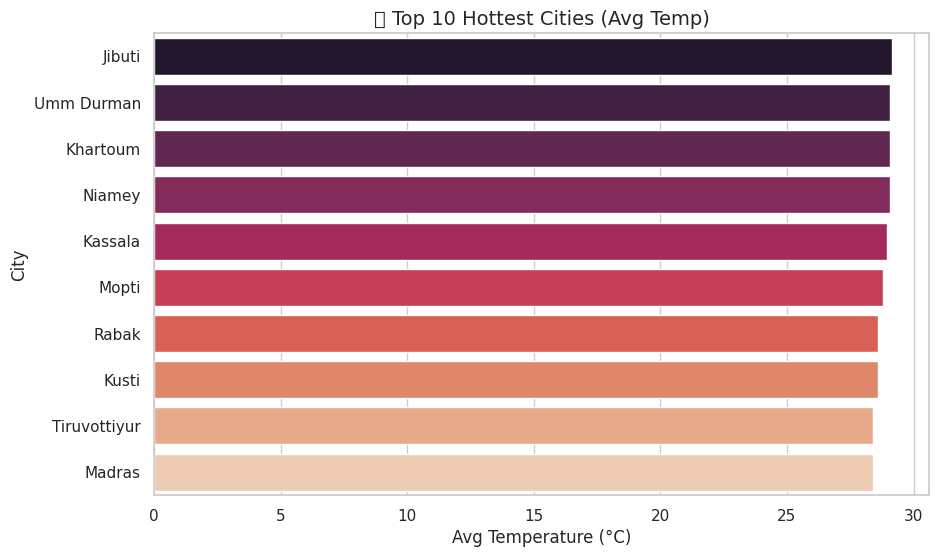

In [ ]:
city_avg = df.groupby('City')['AverageTemperature'].mean().dropna().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=city_avg.values, y=city_avg.index, palette='rocket')
plt.title("🔥 Top 10 Hottest Cities (Avg Temp)", fontsize=14)
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("City")
plt.show()
